In [1]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Transmon, double-tone
rwa_wdq_red_larger = [6.0243, 6.0147, 6.0017, 5.9845, 5.9630]
rwa_shift_red_larger = [0.0243, 0.0147, 0.0017, -0.0155, -0.0370]
rwa_shift_th_red_larger = [0.025, 0.016, 0.004, -0.010, -0.027]
rwa_wsb_red_larger = [0.00083, 0.0009458, 0.001697, 0.002638, 0.003865]
rwa_wdq_blue_larger = [6.9829, 6.9748, 6.9629, 6.9485, 6.9299]
rwa_shift_blue_larger = [-0.0171, -0.0252, -0.0371, -0.0515, -0.0701]
rwa_shift_th_blue_larger = [-0.017, -0.024, -0.035, -0.049, -0.066]
rwa_wsb_blue_larger = [0.0004181, 0.0009476, 0.001756, 0.002690, 0.003957]

fp_wdq_red_larger = [6.0051, 5.9881, 5.6260]
fp_shift_red_larger = [0.0050, -0.0119, -0.3740]
fp_shift_th_red_larger = [-0.007, -0.015, -0.022]
fp_wsb_red_larger = [0.0008956, 0.001893, 0.003]
fp_wdq_blue_larger = [6.9608, 6.9455, 6.9236, 6.8942, 6.8566]
fp_shift_blue_larger = [-0.0392, -0.0545, -0.0764, -0.1058, -0.1434]
fp_shift_th_blue_larger = [-0.033, -0.041, -0.052, -0.066, -0.085]
fp_wsb_blue_larger = [0.0007824, 0.001802, 0.003359, 0.005418, 0.008259]

epsfac_larger = [1, 1.5, 2, 2.5, 3]
epsq_larger = 0.025*np.asarray(epsfac_larger)
epsc_larger = 0.317*np.asarray(epsfac_larger)

rwa_wdq_red_smaller = [3.4576, 3.4449, 3.4273, 3.4050, 3.3793]
rwa_shift_red_smaller = [-0.0424, -0.0551, -0.0727, -0.0950, -0.1207]
rwa_shift_th_red_smaller = [-0.043, -0.056, -0.075, -0.098, -0.127]
rwa_wsb_red_smaller = [0.0004480, 0.0009842, 0.001717, 0.002626, 0.003701]
rwa_wdq_blue_smaller = [4.4799, 4.4682, 4.4518, 4.4310, 4.4061]
rwa_shift_blue_smaller = [-0.0201, -0.0318, -0.0482, -0.0690, -0.0939]
rwa_shift_th_blue_smaller = [-0.020, -0.033, -0.052, -0.075, -0.105]
rwa_wsb_blue_smaller = [0.0005230, 0.001035, 0.001815, 0.002782, 0.003906]

fp_wdq_red_smaller = [3.4311, 3.4180, 3.4002, 3.3798]
fp_shift_red_smaller = [-0.0689, -0.0820, -0.0998, -0.1202]
fp_shift_th_red_smaller = [-0.069, -0.082, -0.101, -0.124]
fp_wsb_red_smaller = [0.0003856, 0.0008651, 0.001510, 0.002294]
fp_wdq_blue_smaller = [4.4573, 4.4468, 4.4325, 4.4147, 4.3929]
fp_shift_blue_smaller = [-0.0427, -0.0532, -0.0675, -0.0853, -0.1071]
fp_shift_th_blue_smaller = [-0.045, -0.058, -0.077, -0.101, -0.131]
fp_wsb_blue_smaller = [0.0005706, 0.0007796, 0.001385, 0.002148, 0.003091]

epsfac_smaller = [1, 1.5, 2, 2.5, 3]
epsq_smaller = 0.025*np.asarray(epsfac_smaller)
epsc_smaller = 0.317*np.asarray(epsfac_smaller)

In [3]:
b, a, nq, nc = ops(10, 10)
Hc = 0.2*2*pi*(a + a.dag())*(b + b.dag())
Omfac_range = np.linspace(0.0, 3.19, 13)
epsq_range = 0.025*Omfac_range
epsc_range = 0.317*Omfac_range

rwa_wdq_th_red_larger = list()
rwa_wdq_th_blue_larger = list()
rwa_wdq_th_red_smaller = list()
rwa_wdq_th_blue_smaller = list()
fp_wdq_th_red_larger = list()
fp_wdq_th_blue_larger = list()
fp_wdq_th_red_smaller = list()
fp_wdq_th_blue_smaller = list()

for epsq, epsc in zip(epsq_range, epsc_range):
    Hi = 6.5*2*pi*nq + 4.0*2*pi*nc - 0.2*2*pi/2*b.dag()*b.dag()*b*b
    rwa_wdq_th_red_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                 dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    rwa_wdq_th_blue_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                  dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    
    Hi = 4.0*2*pi*nq + 6.5*2*pi*nc - 0.2*2*pi/2*b.dag()*b.dag()*b*b
    rwa_wdq_th_red_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                  dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    rwa_wdq_th_blue_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                   dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    
    Hi = (6.5+0.2)*2*pi*nq + 4.0*2*pi*nc - 0.2*2*pi/12*(b + b.dag())**4
    fp_wdq_th_red_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    fp_wdq_th_blue_larger.append(drivefreq(10, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                 dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    
    Hi = (4.0+0.2)*2*pi*nq + 6.5*2*pi*nc - 0.2*2*pi/12*(b + b.dag())**4
    fp_wdq_th_red_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                 dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)
    fp_wdq_th_blue_smaller.append(drivefreq(10, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 2, Ec=0.2*2*pi, epsq=2*epsq*2*pi,
                                  dw=0.5*2*pi, epsc=2*epsc*2*pi, resolution=0.0001*2*pi, verbose=False)[0]/2/pi)

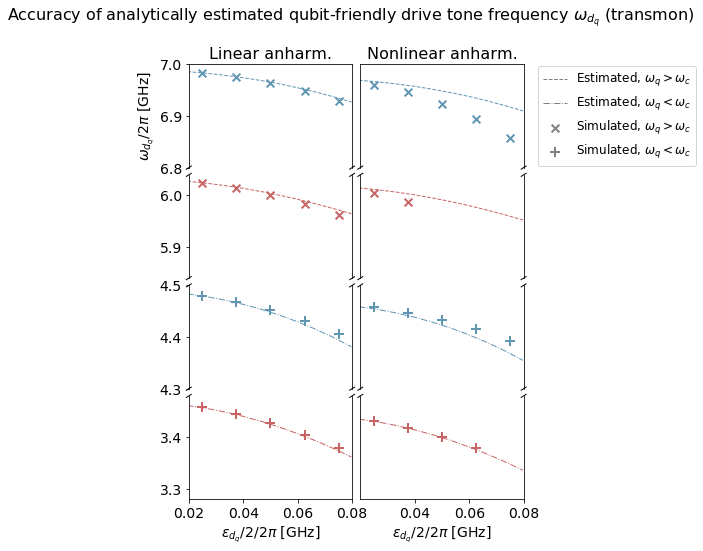

In [9]:
d = .015
ylim1 = [6.8, 7]
ylim2 = [5.84, 6.04]
ylim3 = [4.3, 4.5]
ylim4 = [3.28, 3.48]
xlim  = [0.02, 0.08]

fig, axes = plt.subplots(4, 2, figsize=(6, 8))
fig.suptitle("Accuracy of analytically estimated qubit-friendly drive tone frequency $\\omega_{{d_{{q}}}}$ (transmon)")

# Blue larger
plt.subplot(4, 2, 1)
plt.scatter(epsq_larger, rwa_wdq_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'])
plt.plot(epsq_range, rwa_wdq_th_blue_larger, '--', c=plotcolours['sbblue'])
plt.xlim(xlim)
plt.ylim(ylim1)
plt.ylabel("$\\omega_{{d_{{q}}}}/2\\pi$ [GHz]")
plt.title("Linear anharm.")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)

# Red larger
plt.subplot(4, 2, 3)
plt.scatter(epsq_larger, rwa_wdq_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'])
plt.plot(epsq_range, rwa_wdq_th_red_larger, '--', c=plotcolours['sbred'])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)

# Blue smaller
plt.subplot(4, 2, 5)
plt.scatter(epsq_smaller, rwa_wdq_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'])
plt.plot(epsq_range, rwa_wdq_th_blue_smaller, '-.', c=plotcolours['sbblue'])
plt.xlim(xlim)
plt.ylim(ylim3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)

# Red smaller
plt.subplot(4, 2, 7)
plt.scatter(epsq_smaller, rwa_wdq_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'])
plt.plot(epsq_range, rwa_wdq_th_red_smaller, '-.', c=plotcolours['sbred'])
plt.xlim(xlim)
plt.ylim(ylim4)
plt.xlabel("$\\epsilon_{{d_{{q}}}}/2/2\\pi$ [GHz]")
plt.gca().spines['top'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (1-d,1+d), **kwargs)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)

# Blue larger
plt.subplot(4, 2, 2)
plt.scatter(epsq_larger, fp_wdq_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'])
plt.plot(epsq_range, fp_wdq_th_blue_larger, '--', c=plotcolours['sbblue'])
plt.xlim(xlim)
plt.ylim(ylim1)
plt.title("Nonlinear anharm.")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)

plt.scatter(0, 0, marker='x', lw=2, s=60, c='gray', label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(0, 0, '--', c='gray', label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(0, 0, marker='+', lw=2, s=100, c='gray', label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(0, 0, '-.', c='gray', label="Estimated, $\\omega_q < \\omega_c$")
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.gca().legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

# Red larger
plt.subplot(4, 2, 4)
plt.scatter(epsq_larger[:-2], fp_wdq_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'])
plt.plot(epsq_range, fp_wdq_th_red_larger, '--', c=plotcolours['sbred'])
plt.xlim(xlim)
plt.ylim(ylim2)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)

# Blue smaller
plt.subplot(4, 2, 6)
plt.scatter(epsq_smaller, fp_wdq_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(epsq_range, fp_wdq_th_blue_smaller, '-.', c=plotcolours['sbblue'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim(xlim)
plt.ylim(ylim3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (-d,+d), **kwargs)
plt.plot((1-d,1+d), (-d,+d), **kwargs)
plt.plot((-d,+d), (1-d,1+d), **kwargs)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)

# Red smaller
plt.subplot(4, 2, 8)
plt.scatter(epsq_smaller[:-1], fp_wdq_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(epsq_range, fp_wdq_th_red_smaller, '-.', c=plotcolours['sbred'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim(xlim)
plt.ylim(ylim4)
plt.xlabel("$\\epsilon_{{d_{{q}}}}/2/2\\pi$ [GHz]")
plt.xticks([0.04, 0.06, 0.08])
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False) # labels along the bottom edge are off
plt.gca().spines['top'].set_visible(False)
kwargs = dict(transform=plt.gca().transAxes, color='k', clip_on=False)
plt.plot((-d,+d), (1-d,1+d), **kwargs)
plt.plot((1-d,1+d), (1-d,1+d), **kwargs)

plt.subplots_adjust(wspace=0.05)
plt.subplots_adjust(hspace=0.07)
plt.show()